In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

import os
import numpy as np
from matplotlib.pyplot import gcf
import pandas as pd 
import sys
#import pickle
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn.metrics import pairwise_distances
from sklearn.kernel_ridge import KernelRidge
import math
import dill as pickle

workingdirectory = os.popen('git rev-parse --show-toplevel').read()[:-1]
sys.path.append(workingdirectory)
os.chdir(workingdirectory)

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import allensdk.core.json_utilities as ju

from mcmodels.utils import fill_df_na, fix_pdcsv, truncate_colormap

#connectivities/el_leafsurf_leafsmth_v3_leafleaf_' + str(eval_cre_list_name[c]) + '0422_visp

/Users/samsonkoelle/miniconda3/envs/mcm_class/lib/python3.7/site-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
/Users/samsonkoelle/miniconda3/envs/mcm_class/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.cdnmf_fast module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/samsonkoelle/mouse_connectivity_models/mcmodels/utils.py:27: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3

In [2]:
INPUT_JSON = workingdirectory + '/data/meta/input_011520.json'
input_data = ju.read(INPUT_JSON)
manifest_file = input_data.get('manifest_file')
manifest_file = os.path.join(workingdirectory, manifest_file)
# cache = VoxelModelCache(manifest_file=manifest_file)
mcc = MouseConnectivityCache(manifest_file = manifest_file)
# mcc = MouseConnectivityCache(manifest_file = 'data/meta/mouse_connectivity_manifest.json')
st = mcc.get_structure_tree()
ai_map = st.get_id_acronym_map()
ia_map = {value: key for key, value in ai_map.items()}
summary_ontology = np.load('data/meta/ontological_order_leaves_summary_v3_0610.npy')
major_ontology = np.load('data/meta/ontological_order_leaves_majors_names_v3.npy')
summary_ont = np.asarray([ia_map[summary_ontology[i]] for i in range(len(summary_ontology))])
summary_comb = np.tile(summary_ont,5)

In [3]:
eval_cre_list_name = ['C57BL6J', 'Cux2-IRES-Cre','Ntsr1-Cre_GN220','Rbp4-Cre_KL100','Tlx3-Cre_PL56']

source_reg = np.asarray(['MOp2/3', 'MOp5', 'MOp6a','MOs2/3', 'MOs5', 'MOs6a' ])

source_regions = np.asarray(['VISp2/3', 'VISp4', 'VISp5', 'VISp6a','VISl2/3','VISl4', 'VISl5', 'VISl6a'])
target_regions = [(  'ipsi',     'LGv'), (  'ipsi',     'LGd-sh'),
                  (  'ipsi',     'LGd-co'),
                  (  'ipsi',     'LGd-ip'),
                  ('ipsi','LP'),
                  (  'ipsi',     'VISp1'),
                  (  'ipsi',     'VISp2/3'),
                  (  'ipsi',     'VISp4'),
                  (  'ipsi',     'VISp5'),
                  (  'ipsi',     'VISp6a'),
                  (  'ipsi',     'VISl1'),
                 (  'ipsi',     'VISl2/3'),
                 (  'ipsi',     'VISl4'),
                 (  'ipsi',     'VISl5'),
                 (  'ipsi',     'VISl6a')]

targ_reg = [('ipsi',      'AId1'),
('ipsi',    'AId2/3'),
('ipsi',      'AId5'),
('ipsi',     'AId6a'),
('ipsi',      'AIv1'),
('ipsi',    'AIv2/3'),
('ipsi',      'AIv5'),
('ipsi',     'AIv6a'),
('ipsi',     'AIv6b'),
('ipsi',    'ORBvl1'),
('ipsi',  'ORBvl2/3'),
('ipsi',    'ORBvl5'),
('ipsi',   'ORBvl6a'),
('ipsi',   'ORBvl6b'),
('ipsi',     'TEa1'),
('ipsi',   'TEa2/3'),
('ipsi',     'TEa4'),
('ipsi',     'TEa5'),
('ipsi',    'TEa6a'),
('ipsi',    'TEa6b'),
('ipsi',     'BLAa'),
('ipsi',     'BLAp'),
('ipsi',     'BLAv'),
('ipsi',     'ECT1'),
('ipsi',   'ECT2/3'),
('ipsi',     'ECT5'),
('ipsi',    'ECT6a'),
('ipsi',    'ECT6b'),
('ipsi',   'CEAc'),
('ipsi',   'CEAl'),
('ipsi',   'CEAm')]

In [4]:
# import os
# os.listdir(workingdirectory+ "paper/")

In [7]:
Tlx3_conn = pd.read_csv(workingdirectory+ "/paper/connectivities/revision_thresholded/el_leafsurf_leafsmth_leafleaf_Tlx3-Cre_PL56_080222.csv",   header=[0, 1])
wt_conn = pd.read_csv(workingdirectory+'/paper/connectivities/revision_thresholded/el_leafsurf_leafsmth_leafleaf_C57BL6J_080222.csv',   header=[0, 1])
#wt_conn = pd.read_csv('/Users/samsonkoelle/alleninstitute/sambranch/mouse_connectivity_models/paper/connectivities/el_sumsurf_leafsmth_leafleaf_C57BL6J0428.csv',   header=[0, 1])
Cux2_conn = pd.read_csv(workingdirectory+ '/paper/connectivities/revision_thresholded/el_leafsurf_leafsmth_leafleaf_Cux2-IRES-Cre_080222.csv', header=[0, 1])
Ntsr1_conn = pd.read_csv(workingdirectory+ '/paper/connectivities/revision_thresholded/el_leafsurf_leafsmth_leafleaf_Ntsr1-Cre_GN220_080222.csv',  header=[0, 1])
Rbp4_conn = pd.read_csv(workingdirectory+ '/paper/connectivities/revision_thresholded/el_leafsurf_leafsmth_leafleaf_Rbp4-Cre_KL100_080222.csv',   header=[0, 1])

wt_conn = fix_pdcsv(wt_conn)
Cux2_conn = fix_pdcsv(Cux2_conn)
Ntsr1_conn = fix_pdcsv(Ntsr1_conn)
Rbp4_conn = fix_pdcsv(Rbp4_conn)
Tlx3_conn = fix_pdcsv(Tlx3_conn)

wt_conn_log= np.log10(wt_conn)
Cux2_conn_log = np.log10(Cux2_conn)
Ntsr1_conn_log = np.log10(Ntsr1_conn)
Rbp4_conn_log= np.log10(Rbp4_conn)
Tlx3_conn_log= np.log10(Tlx3_conn)

lowlim = -6
# wt_conn_log = wt_conn_log.clip(lower = lowlim)
# Cux2_conn_log = Cux2_conn_log.clip(lower = lowlim)
# Ntsr1_conn_log = Ntsr1_conn_log.clip(lower = lowlim)
# Rbp4_conn_log = Rbp4_conn_log.clip(lower = lowlim)
# Tlx3_conn_log = Tlx3_conn_log.clip(lower = lowlim)

# NOTE (Sam): not recomputed since revision connectivities are indentical to original submission
av_data = pd.read_csv(workingdirectory+ '/paper/connectivities/el_leafsurf_leafsmth_leafleaf_meandata_0428_log6.csv',header=[0,1])
av_data = fix_pdcsv(av_data)
av_data_log = np.log10(av_data)
av_data_log = av_data_log.clip(lower = lowlim)

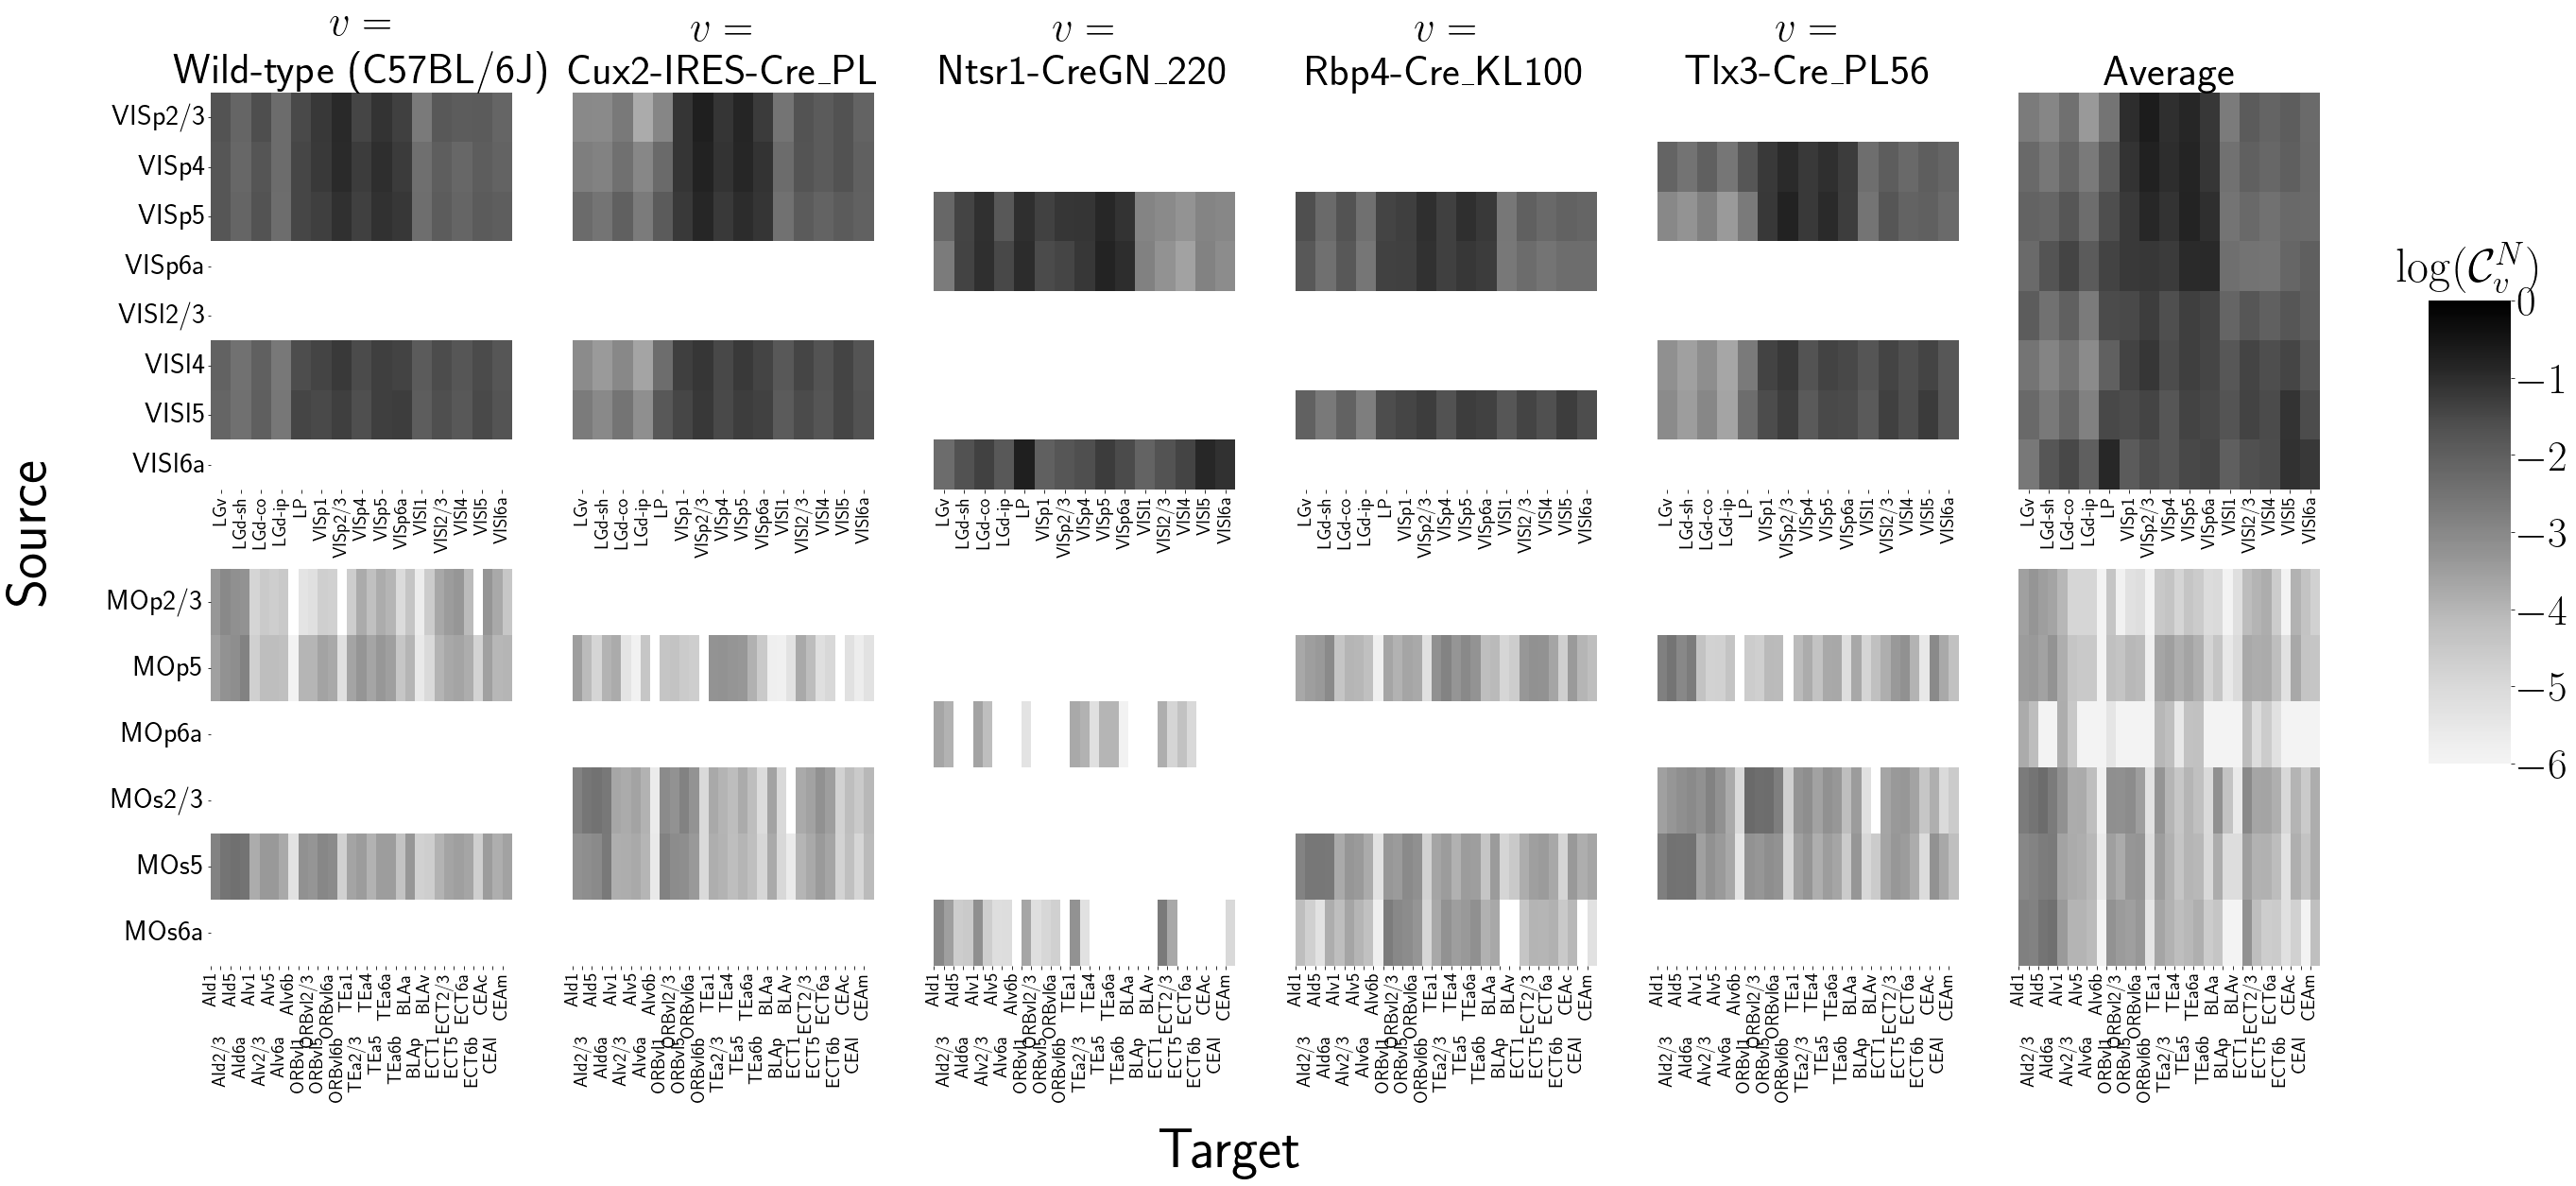

In [8]:
cmap = plt.get_cmap('Greys')
new_cmap = truncate_colormap(cmap, 0.1,1.)
tregion_names = np.asarray(target_regions)[:,1]
treg_names = np.asarray(targ_reg)[:,1]
fig, axes = plt.subplots(2,6, figsize = (40,17))
cbar_ax = fig.add_axes([.94, .3, .03, .4])
tp = wt_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,0], cbar = False,cmap = new_cmap)

tp = wt_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,0], cbar = False,cmap = new_cmap)

tp = Cux2_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,1], cbar = False,cmap = new_cmap)

tp = Cux2_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,1], cbar = False,cmap = new_cmap)

tp = Ntsr1_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,2], cbar = False,cmap = new_cmap)

tp = Ntsr1_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,2], cbar = False,cmap = new_cmap)

tp = Rbp4_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,3], cbar = False,cmap = new_cmap)

tp = Rbp4_conn_log.loc[source_reg].loc[:,targ_reg]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,3], cbar = False,cmap = new_cmap)

tp = Tlx3_conn_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,4], cbar = False,cmap = new_cmap)

tp = Tlx3_conn_log.loc[source_reg].loc[:,targ_reg]
#tp.iloc[tuple(np.where(tp < lowlim))] = lowlim
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,4], cbar = True,cbar_ax= cbar_ax,cmap = new_cmap) #cbar_kws={'label': 'Log projection strength'})

tp = av_data_log.loc[source_regions].loc[:,target_regions]
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[0,5], cbar = False,cmap = new_cmap)

tp = av_data_log.loc[source_reg].loc[:,targ_reg]
#tp.iloc[tuple(np.where(tp < lowlim))] = lowlim
sns.heatmap(tp, vmin = lowlim, vmax= 0., ax= axes[1,5], cbar = True,cbar_ax= cbar_ax,cmap = new_cmap) #cbar_kws={'label': 'Log projection strength'})


cbar_ax.set_title(r"$\log(\mathcal C_v^N)$", fontsize = 50, pad=20)
for t in cbar_ax.get_yticklabels():
     t.set_fontsize(45)

        
axes[0,0].set_title(r"$v =$" + '\n Wild-type (C57BL/6J)', fontsize = 45)
axes[0,1].set_title(r"$v =$" + '\n Cux2-IRES-Cre\_PL', fontsize = 45)
axes[0,2].set_title(r"$v =$" + "\n Ntsr1-CreGN\_220", fontsize = 45)
axes[0,3].set_title(r"$v =$" + '\n Rbp4-Cre\_KL100', fontsize = 45)
axes[0,4].set_title(r"$v =$" + '\n Tlx3-Cre\_PL56', fontsize = 45)
axes[0,5].set_title('Average', fontsize = 45)

axes[0,0].set_xticklabels(tregion_names, fontsize = 20)
axes[0,1].set_xticklabels(tregion_names, fontsize = 20)
axes[0,2].set_xticklabels(tregion_names, fontsize = 20)
axes[0,3].set_xticklabels(tregion_names, fontsize = 20)
axes[0,4].set_xticklabels(tregion_names, fontsize = 20)
axes[0,5].set_xticklabels(tregion_names, fontsize = 20)

axes[1,0].set_xticks(list(range(len(treg_names))))
axes[1,1].set_xticks(list(range(len(treg_names))))
axes[1,2].set_xticks(list(range(len(treg_names))))
axes[1,3].set_xticks(list(range(len(treg_names))))
axes[1,4].set_xticks(list(range(len(treg_names))))
axes[1,5].set_xticks(list(range(len(treg_names))))



for i in range(6):
    axes[1,i].set_xticklabels(treg_names, fontsize = 20)
    for tick in axes[1,i].xaxis.get_major_ticks()[1::2]:
        tick.set_pad(70)
    
    

axes[1,0].set_yticklabels(axes[1,0].get_yticklabels(), rotation=0, fontsize = 30)
axes[0,0].set_yticklabels(axes[0,0].get_yticklabels(), rotation=0, fontsize = 30)
axes[1,1].set_yticklabels([])
axes[1,2].set_yticklabels([])
axes[1,3].set_yticklabels([])
axes[1,4].set_yticklabels([])
axes[1,5].set_yticklabels([])
axes[1,1].set_yticks([])
axes[1,2].set_yticks([])
axes[1,3].set_yticks([])
axes[1,4].set_yticks([])
axes[1,5].set_yticks([])
axes[0,1].set_yticklabels([])
axes[0,2].set_yticklabels([])
axes[0,3].set_yticklabels([])
axes[0,4].set_yticklabels([])
axes[0,5].set_yticklabels([])
axes[0,1].set_yticks([])
axes[0,2].set_yticks([])
axes[0,3].set_yticks([])
axes[0,4].set_yticks([])
axes[0,5].set_yticks([])


# axes[1,0].set_ylabel('MOp/MOs Sources', fontsize = 20)
# axes[0,0].set_ylabel('VISp/VISl Sources', fontsize = 20)

axes[1,1].set_ylabel('')
axes[0,1].set_ylabel('')
axes[1,2].set_ylabel('')
axes[0,2].set_ylabel('')
axes[1,3].set_ylabel('')
axes[0,3].set_ylabel('')
axes[1,4].set_ylabel('')
axes[0,4].set_ylabel('')
axes[1,5].set_ylabel('')
axes[0,5].set_ylabel('')

axes[1,0].set_xlabel('')
axes[0,0].set_xlabel('')
axes[1,1].set_xlabel('')
axes[0,1].set_xlabel('')
axes[1,2].set_xlabel('')
axes[0,2].set_xlabel('')
axes[1,3].set_xlabel('')
axes[0,3].set_xlabel('')
axes[1,4].set_xlabel('')
axes[0,4].set_xlabel('')
axes[1,5].set_xlabel('')
axes[0,5].set_xlabel('')

fig.text(0.5, -0.05, 'Target', ha='center', fontsize = 60)
fig.text(0.05, 0.5, 'Source', va='center', rotation='vertical', fontsize = 60)

plt.savefig('paper/KoelleConn_revision/figs/visp_mo', bbox_inches = 'tight')

In [9]:
nleaf= 564
#comb_data = pd.concat([wt_conn,Cux2_conn,Ntsr1_conn,Rbp4_conn,Tlx3_conn])
comb_data = pd.concat([wt_conn,Cux2_conn,Ntsr1_conn,Rbp4_conn,Tlx3_conn])
#gis are structures with nonzero connectivity
nonzero_leafs  = np.where(np.sum(comb_data, axis = 1) !=0.)[0]       


cre_inds = np.concatenate([np.repeat('WT',564), np.repeat('Cux2',564), np.repeat('Ntsr1',564), np.repeat('Rbp4',564),
np.repeat('Tlx3',564) ])#[nonzero_leafs] #ctsss
#codes = cre_inds
#multiind cre_inds, layers, summary

#get layers (inelegant)
layers= np.zeros(comb_data.shape[0], dtype = object)
for i in range(comb_data.shape[0]):
    if np.asarray(list(comb_data.index))[i][-3:] == '2/3':
        layers[i] = '2/3'
    if np.asarray(list(comb_data.index))[i][-1:] == '1':
        layers[i] = '1'
    if np.asarray(list(comb_data.index))[i][-1:] == '4':
        layers[i] = '4'
    if np.asarray(list(comb_data.index))[i][-1:] == '5':
        layers[i] = '5'    
    if np.asarray(list(comb_data.index))[i][-2:] == '6a':
        layers[i] = '6a' 
        #print('6a')
    if np.asarray(list(comb_data.index))[i][-2:] == '6b':
        layers[i] = '6b'
        
targs = np.asarray(list(comb_data.columns))[:,1]
layers_targs = np.zeros(targs.shape[0], dtype = object)
for i in range(targs.shape[0]):
    if np.asarray(list(targs))[i][-3:] == '2/3':
        layers_targs[i] = '2/3'
    if np.asarray(list(targs))[i][-1:] == '1':
        layers_targs[i] = '1'
    if np.asarray(list(targs))[i][-1:] == '4':
        layers_targs[i] = '4'
    if np.asarray(list(targs))[i][-1:] == '5':
        layers_targs[i] = '5'    
    if np.asarray(list(targs))[i][-2:] == '6a':
        layers_targs[i] = '6a' 
    if np.asarray(list(targs))[i][-2:] == '6b':
        layers_targs[i] = '6b'

layers = np.asarray(layers, dtype = 'str')
row_multi_ind = np.vstack([cre_inds,summary_comb,layers])
row_multi_ind = np.asarray(row_multi_ind)
row_multi_ind_tuples = list(zip(*row_multi_ind))
row_multi_ind_tuples = pd.MultiIndex.from_tuples(row_multi_ind_tuples, names=['Cre', 'Summary Structure','Layer'])
vis_inds = np.where(np.asarray([Cux2_conn.index[i][:3] == 'VIS' for i in range(540)]))[0]
vis_inds  = np.concatenate([vis_inds, vis_inds + nleaf*1, vis_inds + nleaf*2, vis_inds + nleaf*3, vis_inds + nleaf*4])
keep_ind = np.intersect1d(vis_inds, nonzero_leafs)


comb_data_vis = comb_data.iloc[keep_ind]
comb_data_vis_log = np.log10(comb_data.iloc[keep_ind])
comb_data_vis_log[comb_data_vis_log < -6] = -6

targs = np.where(np.isin(major_ontology,['Isocortex','TH']))[0]
col_multi_ind = np.vstack([major_ontology,summary_comb[:564],layers_targs[:564]])

col_multi_ind = np.asarray(col_multi_ind)
col_multi_ind_tuples = list(zip(*col_multi_ind))
col_multi_ind_tuples = pd.MultiIndex.from_tuples(col_multi_ind_tuples, names=['Major', 'Summary Structure','Layer'])

keep_ind = targs
col_multi_ind_tuples = col_multi_ind_tuples[keep_ind]

major_labels = col_multi_ind_tuples.get_level_values("Major")
major_pal = sns.color_palette("tab20", n_colors = major_labels.unique().size)
major_lut = dict(zip(map(str, major_labels.unique()), major_pal))
major_colors = pd.Series(major_labels, index=col_multi_ind_tuples).map(major_lut)

layer_labels_col = col_multi_ind_tuples.get_level_values("Layer")
layer_pal_col = sns.color_palette("Set1", n_colors = layer_labels_col.unique().size) #sns.cubehelix_palette(layer_labels.unique().size, light=1., dark=0., reverse=False, start=0, rot=-1, hue = 1)
layer_lut_col = dict(zip(map(str, layer_labels_col.unique()), layer_pal_col))
layer_colors_col = pd.Series(layer_labels_col, index=col_multi_ind_tuples).map(layer_lut_col)

arr = np.zeros((len(keep_ind),2), dtype = object)
arr[:,0] = major_colors
arr[:,1] = layer_colors_col
combined_colors_col = pd.DataFrame(arr, index = layer_colors_col.index)
keep_ind = np.intersect1d(vis_inds, nonzero_leafs)

row_multi_ind_tuples = row_multi_ind_tuples[keep_ind]

cre_labels = row_multi_ind_tuples.get_level_values("Cre")
cre_pal = sns.color_palette("Set2", n_colors = cre_labels.unique().size)
cre_lut = dict(zip(map(str, cre_labels.unique()), cre_pal))
cre_colors = pd.Series(cre_labels, index=row_multi_ind_tuples).map(cre_lut)

summary_labels = row_multi_ind_tuples.get_level_values("Summary Structure")
summary_pal = sns.color_palette("Spectral", summary_labels.unique().size) #sns.cubehelix_palette(summary_labels.unique().size, light=.9, dark=0.1, reverse=False, start=0, rot=-1, hue = 1)#sns.cubehelix_palette(summary_labels.unique().size, light=1., dark=0., reverse=False, start=0, rot=-1, hue = 1)
summary_lut = dict(zip(map(str, summary_labels.unique()), summary_pal))
summary_colors = pd.Series(summary_labels, index=row_multi_ind_tuples).map(summary_lut)


In [10]:
layer_labels_row = row_multi_ind_tuples.get_level_values("Layer")
layer_colors_row = pd.Series(layer_labels_row, index=row_multi_ind_tuples).map(layer_lut_col)

arr = np.zeros((len(keep_ind),3), dtype = object)
arr[:,0] = cre_colors
arr[:,1] = summary_colors
arr[:,2] = layer_colors_row
combined_colors = pd.DataFrame(arr, index = summary_colors.index)

comb_data_vis_log_sub = comb_data_vis_log.iloc[:,targs]
comb_data_vis_log_sub.columns = col_multi_ind_tuples
comb_data_vis_log_sub.index = row_multi_ind_tuples

/Users/samsonkoelle/miniconda3/envs/mcm_class/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/samsonkoelle/miniconda3/envs/mcm_class/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


1
2/3
5
6a
6b
4


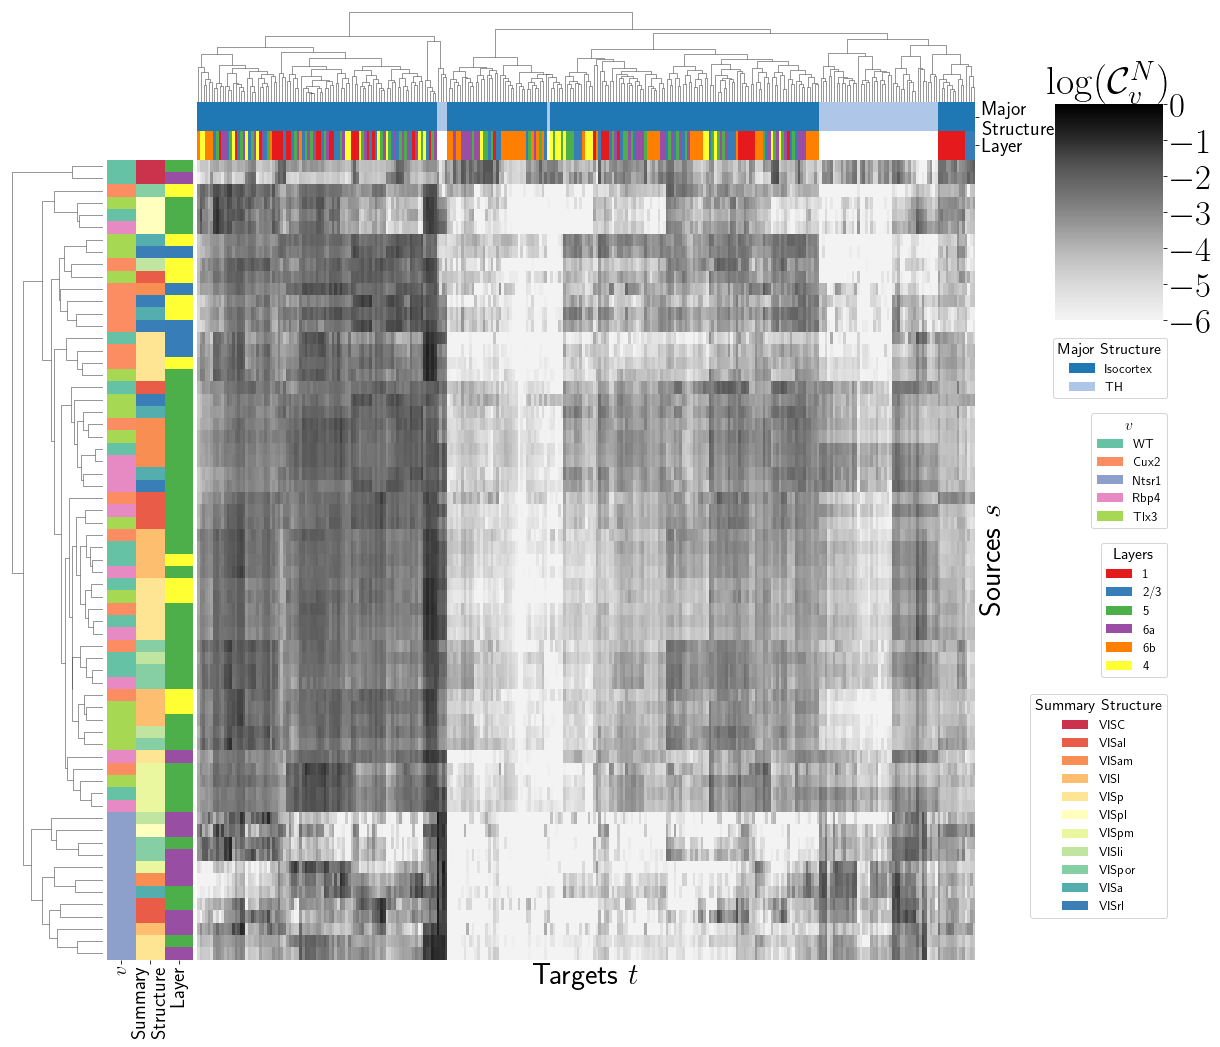

In [12]:
g = sns.clustermap(comb_data_vis_log_sub, col_cluster = True, row_cluster = True, 
                   figsize = (15,15), cmap = new_cmap, col_colors = combined_colors_col, row_colors = combined_colors, dendrogram_ratio=0.1, cbar_pos=[.98,.7,0.1,0.2], vmin = -6, vmax = 0)

g.ax_col_colors.set_yticklabels(['Major \n Structure','Layer'], fontsize = 20)
g.ax_row_colors.set_xticklabels([r"$v$",'Summary \n Structure','Layer'], fontsize= 20)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_yticklabels([])
g.ax_heatmap.set_xticklabels([])
g.ax_heatmap.set_xlabel('Targets ' + r"$t$", fontsize = 30)
g.ax_heatmap.set_ylabel('Sources ' + r"$s$", fontsize = 30)

ax = gcf().add_axes((0.55,.9,0.,0.))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
for label in summary_labels.unique():
    ax.bar(0, 0, color=summary_lut[label], label=label, linewidth=0.)
l4 = ax.legend(title='Summary Structure', ncol=1, bbox_to_anchor=(1.09, .36), bbox_transform=gcf().transFigure, fontsize = 13,title_fontsize=16)    

ax2 = gcf().add_axes((0.55,.55,0.,0.))
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
for label in cre_labels.unique():
    ax2.bar(0, 0, color=cre_lut[label], label=label, linewidth=0.)
l4 = ax2.legend(title=r"$v$", ncol=1, bbox_to_anchor=(1.09, .62), bbox_transform=gcf().transFigure, fontsize = 13,title_fontsize=16)    

ax3 = gcf().add_axes((0.55,.15,0.,0.))
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
for label in major_labels.unique():
    ax3.bar(0, 0, color=major_lut[label], label=label, linewidth=0.)
l4 = ax3.legend(title='Major Structure', ncol=1, bbox_to_anchor=(1.09, .69), bbox_transform=gcf().transFigure, fontsize = 13,title_fontsize=16)    

ax4 = gcf().add_axes((0.55,.75,0.,0.))
ax4.xaxis.set_visible(False)
ax4.yaxis.set_visible(False)
for label in layer_labels_col.unique()[:-1]:
    print(label)
    ax4.bar(0, 0, color=layer_lut_col[label], label=label, linewidth=0.)
l4 = ax4.legend(title='Layers', ncol=1, bbox_to_anchor=(1.09, .5), bbox_transform=gcf().transFigure, fontsize = 13,title_fontsize=16)    

g.ax_cbar.set_title(r"$\log (\mathcal C_v^N)$", rotation=0, fontsize = 40)
for t in g.ax_cbar.get_yticklabels():
     t.set_fontsize(35)
g.savefig('paper/KoelleConn_revision/figs/heirarchical.png', bbox_inches = 'tight',pad_inches = 0)
